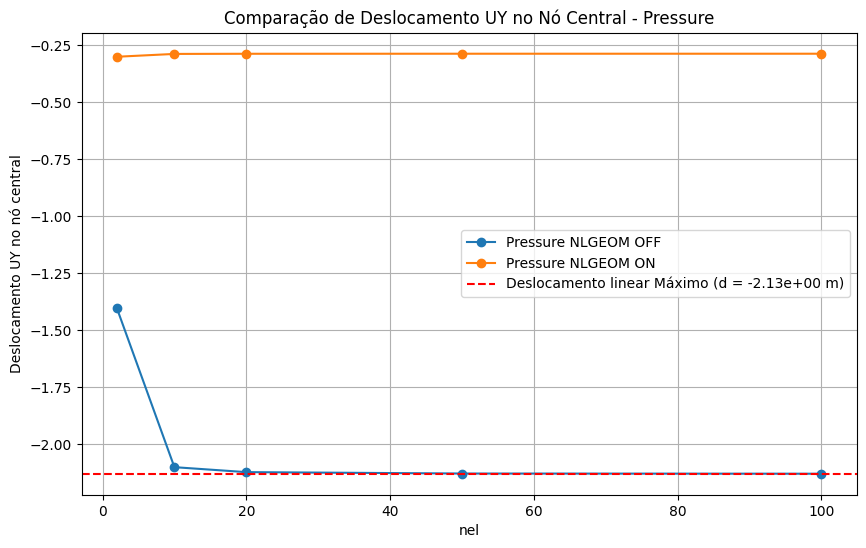

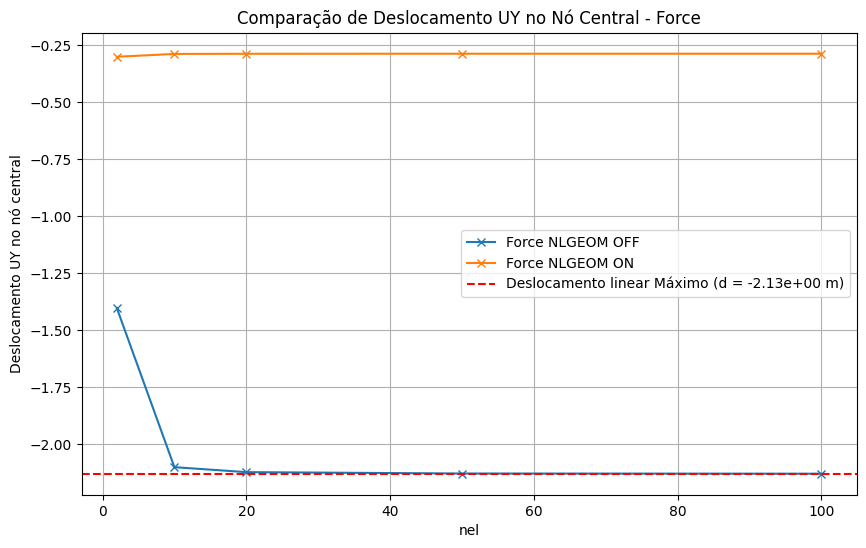

In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

# Diretórios base
base_dir_pressure = "C:/Users/Miguel/Desktop/Lamce/pipe/pressure"
base_dir_force = "C:/Users/Miguel/Desktop/Lamce/pipe/force"

# Casos a serem comparados
nels = [2, 10, 20, 50, 100]
nlgeom_options = ['OFF', 'ON']

# Parâmetros
rho_s = 7000.0      # Densidade do riser em kg/m³
L_s = 30.0          # Comprimento do riser em metros
De_s = 0.20         # Diâmetro externo do riser em metros
Di_s = 0.12         # Diâmetro interno do riser em metros
E_s = 100.0e9       # Módulo de Young do riser em Pa

Thic_riser = (De_s - Di_s) / 2  # Espessura do riser

pi = np.pi
A_s = 0.25 * pi * (De_s**2 - Di_s**2)  # Área da seção transversal
grav_z = 9.81                          # Aceleração gravitacional em m/s²
Force1 = rho_s * A_s * L_s * grav_z    # Força total
q = Force1 / L_s                       # Carga distribuída
Inercia = pi * (De_s**4 - Di_s**4) / 64  # Momento de inércia

# Função para ler o deslocamento UY do nó central a partir do arquivo CSV
def read_uy_from_csv(filepath):
    with open(filepath, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            if row[0] == 'Nó Central':
                return float(row[2])  # UY está na terceira coluna

# Coletar dados
data_pressure = {'OFF': [], 'ON': []}
data_force = {'OFF': [], 'ON': []}

for nel in nels:
    for nlgeom_option in nlgeom_options:
        # Arquivos CSV para pressure
        csv_filepath_pressure = os.path.join(base_dir_pressure, f'nel_{nel}_nlgeom_{nlgeom_option}', f'displacements_nel_{nel}_nlgeom_{nlgeom_option}.csv')
        uy_pressure = read_uy_from_csv(csv_filepath_pressure)
        data_pressure[nlgeom_option].append(uy_pressure)
        
        # Arquivos CSV para force
        csv_filepath_force = os.path.join(base_dir_force, f'nel_{nel}_nlgeom_{nlgeom_option}', f'displacements_nel_{nel}_nlgeom_{nlgeom_option}.csv')
        uy_force = read_uy_from_csv(csv_filepath_force)
        data_force[nlgeom_option].append(uy_force)

# Calcular deslocamento teórico máximo
dzin = -(5 * q * (L_s**4)) / (384 * E_s * Inercia)

# Plotar os dados para pressure
plt.figure(figsize=(10, 6))
plt.plot(nels, data_pressure['OFF'], label='Pressure NLGEOM OFF', marker='o')
plt.plot(nels, data_pressure['ON'], label='Pressure NLGEOM ON', marker='o')
plt.axhline(y=dzin, color='r', linestyle='--', label=f'Deslocamento linear Máximo (d = {dzin:.2e} m)')
plt.xlabel('nel')
plt.ylabel('Deslocamento UY no nó central')
plt.title('Comparação de Deslocamento UY no Nó Central - Pressure')
plt.legend()
plt.grid(True)
plt.show()

# Plotar os dados para force
plt.figure(figsize=(10, 6))
plt.plot(nels, data_force['OFF'], label='Force NLGEOM OFF', marker='x')
plt.plot(nels, data_force['ON'], label='Force NLGEOM ON', marker='x')
plt.axhline(y=dzin, color='r', linestyle='--', label=f'Deslocamento linear Máximo (d = {dzin:.2e} m)')
plt.xlabel('nel')
plt.ylabel('Deslocamento UY no nó central')
plt.title('Comparação de Deslocamento UY no Nó Central - Force')
plt.legend()
plt.grid(True)
plt.show()

